In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
from google.colab import files

files.upload()

Saving Prostate_Cancer (1).csv to Prostate_Cancer (1).csv


{'Prostate_Cancer (1).csv': b'id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension\r\n1,M,23,12,151,954,0.143,0.278,0.242,0.079\r\n2,B,9,13,133,1326,0.143,0.079,0.181,0.057\r\n3,M,21,27,130,1203,0.125,0.16,0.207,0.06\r\n4,M,14,16,78,386,0.07,0.284,0.26,0.097\r\n5,M,9,19,135,1297,0.141,0.133,0.181,0.059\r\n6,B,25,25,83,477,0.128,0.17,0.209,0.076\r\n7,M,16,26,120,1040,0.095,0.109,0.179,0.057\r\n8,M,15,18,90,578,0.119,0.165,0.22,0.075\r\n9,M,19,24,88,520,0.127,0.193,0.235,0.074\r\n10,M,25,11,84,476,0.119,0.24,0.203,0.082\r\n11,M,24,21,103,798,0.082,0.067,0.153,0.057\r\n12,M,17,15,104,781,0.097,0.129,0.184,0.061\r\n13,B,14,15,132,1123,0.097,0.246,0.24,0.078\r\n14,M,12,22,104,783,0.084,0.1,0.185,0.053\r\n15,M,12,13,94,578,0.113,0.229,0.207,0.077\r\n16,M,22,19,97,659,0.114,0.16,0.23,0.071\r\n17,M,10,16,95,685,0.099,0.072,0.159,0.059\r\n18,M,15,14,108,799,0.117,0.202,0.216,0.074\r\n19,M,20,14,130,1260,0.098,0.103,0.158,0.054\r\n20,B,17,11,87,566,

In [ ]:
import pandas as pd
df=pd.read_csv("Prostate_Cancer.csv")
print (df)

     id diagnosis_result  radius  texture  perimeter  area  smoothness  \
0     1                M      23       12        151   954       0.143   
1     2                B       9       13        133  1326       0.143   
2     3                M      21       27        130  1203       0.125   
3     4                M      14       16         78   386       0.070   
4     5                M       9       19        135  1297       0.141   
..  ...              ...     ...      ...        ...   ...         ...   
95   96                M      23       16        132  1264       0.091   
96   97                B      22       14         78   451       0.105   
97   98                B      19       27         62   295       0.102   
98   99                B      21       24         74   413       0.090   
99  100                M      16       27         94   643       0.098   

    compactness  symmetry  fractal_dimension  
0         0.278     0.242              0.079  
1         0.079  

In [ ]:
x=df.drop('diagnosis_result', axis=1)
y=df['diagnosis_result']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#SVM model
clf_svc = SVC(kernel="rbf")
clf_svc.fit(X_test, y_test)

# Make predictions
y_test_pred_svm = clf_svc.predict(X_test)

# Confusion matrix and classification report for Test Set
conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)
class_report_svm = classification_report(y_test, y_test_pred_svm)

print("SVM Confusion Matrix:")
print(conf_matrix_svm)
print("\nSVM Classification Report:")
print(class_report_svm)




SVM Confusion Matrix:
[[ 7  1]
 [ 0 22]]

SVM Classification Report:
              precision    recall  f1-score   support

           B       1.00      0.88      0.93         8
           M       0.96      1.00      0.98        22

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
# Make predictions
#SVM model
clf_svc = SVC(kernel="rbf")
clf_svc.fit(X_train, y_train)
y_train_pred_svm = clf_svc.predict(X_train)

# Confusion matrix and classification report for Train Set
conf_matrix_train_svm = confusion_matrix(y_train, y_train_pred_svm)
class_report_train_svm = classification_report(y_train, y_train_pred_svm)

print("SVM Confusion Matrix:")
print(conf_matrix_train_svm )
print("\nSVM Classification Report:")
print(class_report_train_svm)


SVM Confusion Matrix:
[[25  5]
 [ 0 40]]

SVM Classification Report:
              precision    recall  f1-score   support

           B       1.00      0.83      0.91        30
           M       0.89      1.00      0.94        40

    accuracy                           0.93        70
   macro avg       0.94      0.92      0.93        70
weighted avg       0.94      0.93      0.93        70



In [ ]:
#Decision Tree Model
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5)

# Train a decision tree classifier using Gini impurity
dt_gini.fit(X_train, y_train)

# Make predictions
y_pred_tree = dt_gini.predict(X_train)

# Confusion matrix and classification report for Train Set
conf_matrix_tree = confusion_matrix(y_train, y_pred_tree)
class_report_tree = classification_report(y_train, y_pred_tree)

print("Decision Tree Confusion Matrix:")
print(conf_matrix_tree)
print("\nDecision Tree Classification Report:")
print(class_report_tree)


Decision Tree Confusion Matrix:
[[26  4]
 [ 2 38]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           B       0.93      0.87      0.90        30
           M       0.90      0.95      0.93        40

    accuracy                           0.91        70
   macro avg       0.92      0.91      0.91        70
weighted avg       0.91      0.91      0.91        70



In [ ]:
#Decision Tree Model
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5)

# Train a decision tree classifier using Gini impurity
dt_gini.fit(X_test, y_test)

# Make predictions
y_test_tree = dt_gini.predict(X_test)

# Confusion matrix and classification report for Test Set
conf_matrix_test_tree = confusion_matrix(y_test, y_test_tree)
class_report_test_tree = classification_report(y_test, y_test_tree)

print("Decision Tree Confusion Matrix:")
print(conf_matrix_test_tree)
print("\nDecision Tree Classification Report:")
print(class_report_test_tree)


Decision Tree Confusion Matrix:
[[ 6  2]
 [ 2 20]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           B       0.75      0.75      0.75         8
           M       0.91      0.91      0.91        22

    accuracy                           0.87        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.87      0.87      0.87        30



In [ ]:
# Calculate Pearson correlation coefficient
correlation_matrix = x.corr()

# Select the number of features and create a SelectKBest object
num_features_to_select = 2  # You can adjust this number
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)

# Fit the selector to your data
x_selected = selector.fit_transform(x, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the feature names corresponding to the selected indices
selected_feature_names = x.columns[selected_feature_indices]

# Print the correlation matrix, selected features, and their rankings
print("Correlation Matrix:")
print(correlation_matrix)

print("\nSelected Features:")
print(selected_feature_names)

print("\nFeature Ranking:")
print(selector.scores_)

# Get features in rank 1 (highest score)
rank_1_features = [feature for feature, score in zip(x.columns, selector.scores_) if score == max(selector.scores_)]

print("\nFeatures in Rank 1:")
print(rank_1_features)

Correlation Matrix:
                         id    radius   texture  perimeter      area  \
id                 1.000000  0.047276  0.052263  -0.215953 -0.174354   
radius             0.047276  1.000000  0.100245  -0.238216 -0.250934   
texture            0.052263  0.100245  1.000000  -0.113453 -0.113725   
perimeter         -0.215953 -0.238216 -0.113453   1.000000  0.976648   
area              -0.174354 -0.250934 -0.113725   0.976648  1.000000   
smoothness        -0.258328 -0.127121  0.102321   0.269442  0.208438   
compactness       -0.277554 -0.191490  0.032446   0.527542  0.424950   
symmetry          -0.222334 -0.039707  0.077912   0.195539  0.110435   
fractal_dimension -0.164946 -0.029120  0.139157  -0.195434 -0.274344   

                   smoothness  compactness  symmetry  fractal_dimension  
id                  -0.258328    -0.277554 -0.222334          -0.164946  
radius              -0.127121    -0.191490 -0.039707          -0.029120  
texture              0.102321     0.0

In [ ]:
#predict accuracy score for test set.
prediction1 = clf_svc.predict(X_test)
prediction2 = dt_gini.predict(X_test)

In [ ]:
clf_svm_acc = accuracy_score(y_test, prediction1)
dt_acc = accuracy_score(y_test, prediction2)

print("Accuracy of SVM model is: ", clf_svm_acc)
print("Accuracy of Decision Tree Model is: ", dt_acc)


Accuracy of SVM model is:  0.8
Accuracy of Decision Tree Model is:  0.8666666666666667


In [ ]:
#predict accuracy score for train set.
prediction1 = clf_svc.predict(X_train)
prediction2 = dt_gini.predict(X_train)

clf_train_svm_acc = accuracy_score(y_train, prediction1)
dt_train_acc = accuracy_score(y_train, prediction2)

print("Accuracy of SVM model is: ", clf_svm_acc)
print("Accuracy of Decision Tree Model is: ", dt_acc)


Accuracy of SVM model is:  0.8
Accuracy of Decision Tree Model is:  0.8666666666666667


In [ ]:
import matplotlib.pyplot as plt

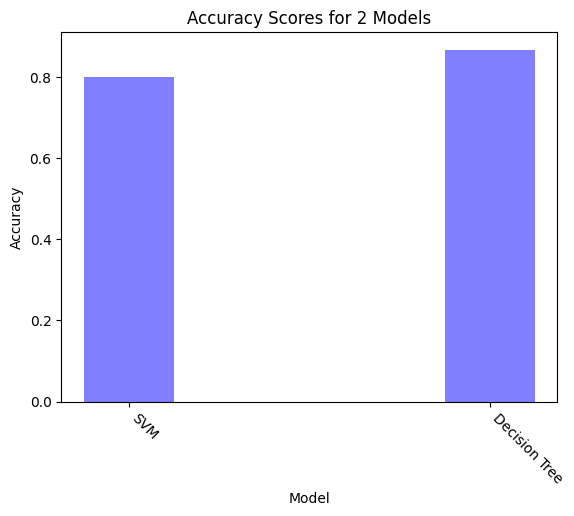

Accuracy of SVM model is:  0.8
Accuracy of Decision Tree Model is:  0.8666666666666667


In [ ]:
# Define the accuracy scores for each model
model_names = [ 'SVM', 'Decision Tree']
accuracy_scores = [clf_svm_acc,dt_acc]


width = 0.25
fig, ax = plt.subplots()
# Create a bar plot
plt.bar(model_names, accuracy_scores, width, alpha=0.5, color='blue')

# Add x-axis and y-axis labels and a title
plt.xlabel('Model')
plt.ylabel('Accuracy')# rotates labels
plt.title('Accuracy Scores for 2 Models')
plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha = 'left' )

# Display the plot
plt.show()

#Accuracies
print("Accuracy of SVM model is: ", clf_svm_acc)
print("Accuracy of Decision Tree Model is: ", dt_acc)


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.01, 0.1, 1]}

# Perform Grid Search to find optimal hyperparameters
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)


Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(clf_svc, x, y, cv=5)
print("Cross-Validation Scores:", cv_scores)


Cross-Validation Scores: [0.7  0.85 0.75 0.85 0.8 ]


In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(dt_gini, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()


NameError: name 'feature_names' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load the dataset (Replace 'your_dataset.csv' with the actual file)
from google.colab import files

files.upload()



Saving Prostate_Cancer.csv to Prostate_Cancer.csv


{'Prostate_Cancer.csv': b'id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension\r\n1,M,23,12,151,954,0.143,0.278,0.242,0.079\r\n2,B,9,13,133,1326,0.143,0.079,0.181,0.057\r\n3,M,21,27,130,1203,0.125,0.16,0.207,0.06\r\n4,M,14,16,78,386,0.07,0.284,0.26,0.097\r\n5,M,9,19,135,1297,0.141,0.133,0.181,0.059\r\n6,B,25,25,83,477,0.128,0.17,0.209,0.076\r\n7,M,16,26,120,1040,0.095,0.109,0.179,0.057\r\n8,M,15,18,90,578,0.119,0.165,0.22,0.075\r\n9,M,19,24,88,520,0.127,0.193,0.235,0.074\r\n10,M,25,11,84,476,0.119,0.24,0.203,0.082\r\n11,M,24,21,103,798,0.082,0.067,0.153,0.057\r\n12,M,17,15,104,781,0.097,0.129,0.184,0.061\r\n13,B,14,15,132,1123,0.097,0.246,0.24,0.078\r\n14,M,12,22,104,783,0.084,0.1,0.185,0.053\r\n15,M,12,13,94,578,0.113,0.229,0.207,0.077\r\n16,M,22,19,97,659,0.114,0.16,0.23,0.071\r\n17,M,10,16,95,685,0.099,0.072,0.159,0.059\r\n18,M,15,14,108,799,0.117,0.202,0.216,0.074\r\n19,M,20,14,130,1260,0.098,0.103,0.158,0.054\r\n20,B,17,11,87,566,0.09

In [ ]:
df = pd.read_csv("Prostate_Cancer.csv")

# Extract features and labels
X = df.drop('diagnosis_result', axis=1)
y = df['diagnosis_result']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the SVM model
clf_svc = SVC(kernel="rbf")
clf_svc.fit(X_scaled, y)

# User interface for predictions
print("Enter the values for the following features:")
features = {}
for column in X.columns:
    value = float(input(f"{column}: "))
    features[column] = value

# Create a DataFrame with user input
user_data = pd.DataFrame([features])

# Standardize user input
user_data_scaled = scaler.transform(user_data)

# Make predictions
prediction = clf_svc.predict(user_data_scaled)[0]

# Map the prediction to 'M' (malignant) or 'B' (benign)
result_mapping = {'M': 'malignant', 'B': 'benign'}
predicted_diagnosis = result_mapping[prediction]

# Display the prediction
print(f"The predicted diagnosis result is: {predicted_diagnosis}")

Enter the values for the following features:
id: 3
radius: 12
texture: 2
perimeter: 12
area: 12
smoothness: 12
compactness: 12
symmetry: 23
fractal_dimension: 24
The predicted diagnosis result is: malignant
